1) построить боксплот для переменной vowel.dur при условиях, заданных в столбце roundness с использованием ggplot и аргумента notch=TRUE в геоме geom_boxplot; нанести на боксплот медиану или среднее для каждого ящика в виде точки

2) применить t-test и его непараметрический аналог

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
icelandic <- read.csv('https://raw.githubusercontent.com/LingData2019/LingData2020/master/data/icelandic.csv')
str(icelandic)

'data.frame':	806 obs. of  31 variables:
 $ speaker        : chr  "brs02" "brs02" "brs02" "bte03" ...
 $ index          : int  137 138 139 15 16 17 4 5 6 113 ...
 $ word           : chr  "kokk" "kokk" "kokk" "kokk" ...
 $ time           : num  438 441 443 133 138 ...
 $ word.dur       : num  489 444 450 530 515 ...
 $ voicing.dur    : num  153.2 138.7 169.8 93.6 159.3 ...
 $ vowel.dur      : num  100.9 72.6 107.5 93 107.4 ...
 $ cluster.dur    : num  231 217 195 245 230 ...
 $ spreading.dur  : num  114.3 98.2 50.1 119.2 45.1 ...
 $ sonorant.dur   : num  167 164 112 120 97 ...
 $ closure.dur    : num  64.7 52.7 82.3 125.3 133.2 ...
 $ vor            : num  332 290 302 338 338 ...
 $ voffr          : num  179 151 132 244 178 ...
 $ mor            : num  231 217 195 245 230 ...
 $ cond_no        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ ipa            : chr  "kʰoʰk" "kʰoʰk" "kʰoʰk" "kʰoʰk" ...
 $ cons1          : chr  "asp" "asp" "asp" "asp" ...
 $ vowel          : chr  "o" "o" "o" "o" ...
 $ hei

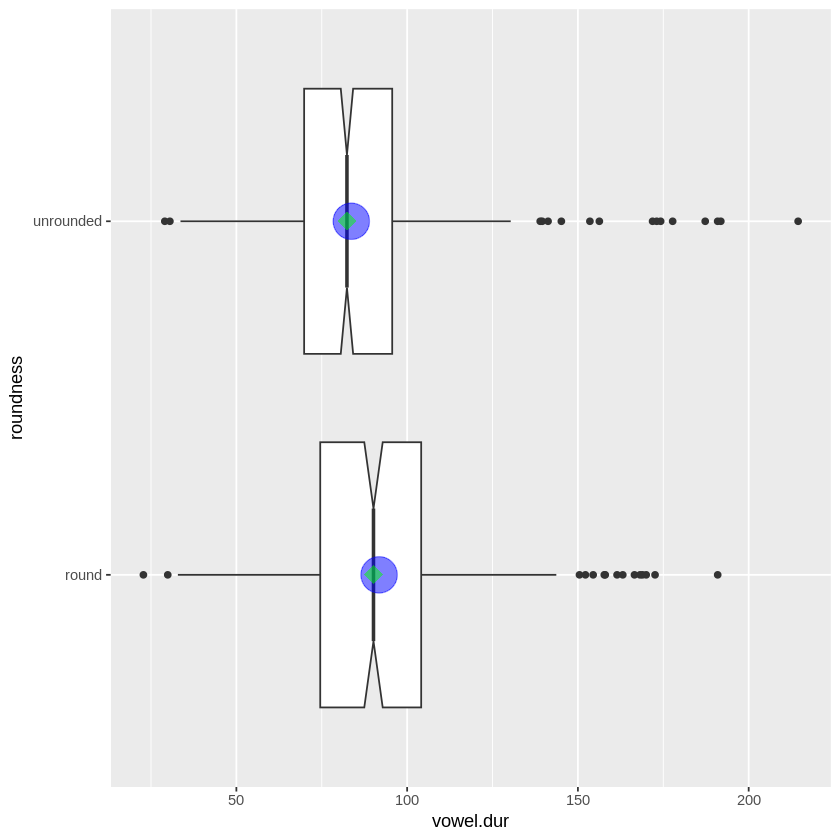

In [22]:
stats_data <- icelandic %>%
  group_by(roundness) %>%
  summarize(median = median(vowel.dur, na.rm = TRUE),
    mean = mean(vowel.dur, na.rm = TRUE))

icelandic %>%
  ggplot(aes(x=vowel.dur, y=roundness)) +
  geom_boxplot(notch=TRUE) +
  geom_point(data=stats_data,
    aes(x=mean, y=roundness),
    shape=20, size=15, color="blue", alpha=0.5) +
    geom_point(data=stats_data,
    aes(x=median, y=roundness),
    shape=18, size=5, color="green", alpha=0.5)

In [30]:
cond1 <- icelandic %>%
  filter(roundness == 'round')
cond2 <- icelandic %>%
  filter(roundness != 'round')

t.test(cond1$vowel.dur, cond2$vowel.dur)


	Welch Two Sample t-test

data:  cond1$vowel.dur and cond2$vowel.dur
t = 4.3548, df = 554.3, p-value = 1.587e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  4.463876 11.799644
sample estimates:
mean of x mean of y 
 91.79000  83.65824 


In [33]:
length(cond1)
length(cond2)

[1] 31

[1] 31

In [37]:
wilcox.test(vowel.dur ~ roundness, data=icelandic)


	Wilcoxon rank sum test with continuity correction

data:  vowel.dur by roundness
W = 90683, p-value = 3.716e-06
alternative hypothesis: true location shift is not equal to 0
